In [42]:
import pickle
import numpy as np
import cv2
import time
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelBinarizer
from keras.models import load_model
import h5py
import keras
from keras.models import Model, Sequential
from keras.layers.core import Dense, Activation, Flatten
from keras.models import Model, Sequential
from keras.layers import Input, Activation, Concatenate, Dense
from keras.layers import Flatten, Dropout, Reshape
from keras.layers import Convolution2D, MaxPooling2D, GlobalAveragePooling2D
from keras.layers import AveragePooling2D

from keras.optimizers import SGD,RMSprop,adam
from keras.utils import np_utils

import matplotlib.pyplot as plt
import matplotlib
import os
import tensorflow as tf
from PIL import Image

from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

import skimage
import skimage.io as io

In [43]:
def network():
    model = Sequential()
    model.add(Convolution2D(32, 3, 3, input_shape=(32, 32, 3)))
    model.add(MaxPooling2D((2, 2)))
    model.add(Activation('relu'))
    model.add(Flatten())
    model.add(Dense(4))
    model.add(Activation('softmax'))

    return model


In [44]:
image_shape = (32, 32, 3)
nb_classes = 3
def network2():
  model = Sequential()
  model.add(Convolution2D(32, 3, 3, border_mode='same', input_shape=image_shape))
  model.add(Activation('relu'))
  model.add(Convolution2D(32, 3, 3))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Convolution2D(64, 3, 3, border_mode='same'))
  model.add(Activation('relu'))
  model.add(Convolution2D(64, 3, 3))
  model.add(Activation('relu'))
  model.add(MaxPooling2D(pool_size=(2, 2)))
  model.add(Dropout(0.25))

  model.add(Flatten())
  model.add(Dense(512))
  model.add(Activation('relu'))
  model.add(Dropout(0.5))
  model.add(Dense(nb_classes))
  model.add(Activation('softmax'))


  return model

In [45]:
def train(file_path, model):

    x_,y_ = pickle.load( open(file_path, "rb" ) )
    random_state = 130
    X_train, x_validation, y_train, y_validation = train_test_split(x_, y_, train_size = 0.80,
                                                                    test_size = 0.2,
                                                                    random_state = random_state)
    # preprocess data
    X_normalized = np.array(X_train / 255.0 - 0.5 )
    label_binarizer = LabelBinarizer()
    y_one_hot = label_binarizer.fit_transform(y_train)

    model.summary()
    model.compile('adam', 'categorical_crossentropy', ['accuracy'])
    history = model.fit(X_normalized, y_one_hot, nb_epoch=20, validation_split=0.2)

    model.save('model.h5')
    return history


In [46]:
model = network2()
model.summary()



/root/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  """
/root/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  import sys
/root/.local/lib/python3.5/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
  if sys.path[0] == '':
/root/.local/lib/python3.5/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_9 (Conv2D)            (None, 32, 32, 32)        896       
_________________________________________________________________
activation_13 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_10 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_14 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_7 (Dropout)          (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_11 (Conv2D)           (None, 15, 15, 64)        18496     
__________

In [47]:
from keras.models import Sequential
from keras.layers.core import Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.optimizers import SGD,RMSprop,adam
from keras.utils import np_utils

import numpy as np
import matplotlib.pyplot as plt
import matplotlib
import os
import tensorflow as tf
from PIL import Image
from numpy import *
# SKLEARN
from sklearn.utils import shuffle
from sklearn.cross_validation import train_test_split

import skimage
import skimage.io as io

In [48]:
red_dir = '/root/TRAFFIC/TRAFFIC/DATA/red'
yellow_dir = '/root/TRAFFIC/TRAFFIC/DATA/yellow'
green_dir = '/root/TRAFFIC/TRAFFIC/DATA/green'

In [49]:

red_listing = os.listdir(red_dir) 
num_red_images = size(red_listing)
yellow_listing = os.listdir(yellow_dir) 
num_yellow_images = size(yellow_listing)
green_listing = os.listdir(green_dir) 
num_green_images = size(green_listing)

print ('red images = ', num_red_images)
print ('yellow images = ', num_yellow_images)
print ('green images = ', num_green_images)

red images =  522
yellow images =  140
green images =  253


In [50]:
red_resized_dir = '/root/TRAFFIC/TRAFFIC/DATA/red_resized'
yellow_resized_dir = '/root/TRAFFIC/TRAFFIC/DATA/yellow_resized'
green_resized_dir = '/root/TRAFFIC/TRAFFIC/DATA/green_resized'

red_resized_listing = os.listdir(red_resized_dir) 
num_red_images = size(red_resized_listing)
yellow_resized_listing = os.listdir(yellow_resized_dir) 
num_yellow_images = size(yellow_resized_listing)
green_resized_listing = os.listdir(green_resized_dir) 
num_green_images = size(green_resized_listing)

print ('red images = ', num_red_images)
print ('yellow images = ', num_yellow_images)
print ('green images = ', num_green_images)

red images =  1044
yellow images =  140
green images =  253


m =  600
n =  800


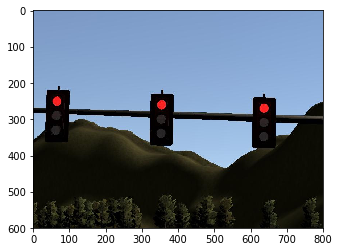

In [51]:
file = 'left8803.jpg'
im = array(Image.open(red_dir + '/' + file))   
m,n = im.shape[0:2] 

img=im
im1 = im
#im_resized = im1.resize(32,32)
plt.imshow(img)

#plt.imshow(img.resize(32,32))

print ('m = ', m)
print ('n = ', n)

In [52]:
red_resized_dir = '/root/TRAFFIC/TRAFFIC/DATA/red_resized'
yellow_resized_dir = '/root/TRAFFIC/TRAFFIC/DATA/yellow_resized'
green_resized_dir = '/root/TRAFFIC/TRAFFIC/DATA/green_resized'

In [53]:
img_rows = 32
img_cols = 32
for file in red_listing:
    img = Image.open(red_dir+'/'+file)
    img_resized = img.resize((img_rows,img_cols))
    img_resized.save(red_resized_dir+'/'+file,"JPEG")

In [54]:
for file in yellow_listing:
    img = Image.open(yellow_dir+'/'+file)
    img_resized = img.resize((img_rows,img_cols))
    img_resized.save(yellow_resized_dir+'/'+file,"JPEG")

In [55]:
for file in green_listing:
    img = Image.open(green_dir+'/'+file)
    img_resized = img.resize((img_rows,img_cols))
    img_resized.save(green_resized_dir+'/'+file,"JPEG")

In [56]:
red_resized_path = red_resized_dir+'/'
yellow_resized_path = yellow_resized_dir+'/'
green_resized_path = green_resized_dir+'/'

x_train = []
all_images = []
for image_path in os.listdir(red_resized_path):
  img = io.imread(red_resized_path+image_path, as_grey=False)
  all_images.append(img)
    
for image_path in os.listdir(yellow_resized_path):
  img = io.imread(yellow_resized_path+image_path, as_grey=False)
  all_images.append(img) 
   
for image_path in os.listdir(green_resized_path):
  img = io.imread(green_resized_path+image_path, as_grey=False)
  all_images.append(img)
    
img_matrix = np.array(all_images)

In [57]:
red_resized_dir = '/root/TRAFFIC/TRAFFIC/DATA/red_resized'
yellow_resized_dir = '/root/TRAFFIC/TRAFFIC/DATA/yellow_resized'
green_resized_dir = '/root/TRAFFIC/TRAFFIC/DATA/green_resized'

red_resized_listing = os.listdir(red_resized_dir) 
num_red_images = size(red_resized_listing)
yellow_resized_listing = os.listdir(yellow_resized_dir) 
num_yellow_images = size(yellow_resized_listing)
green_resized_listing = os.listdir(green_resized_dir) 
num_green_images = size(green_resized_listing)

print ('red images = ', num_red_images)
print ('yellow images = ', num_yellow_images)
print ('green images = ', num_green_images)

red images =  1044
yellow images =  140
green images =  253


In [58]:
print (img_matrix[0])

[[[122 153 197]
  [122 153 197]
  [122 153 197]
  ...
  [129 164 202]
  [130 165 203]
  [128 166 205]]

 [[124 155 199]
  [124 155 199]
  [124 155 199]
  ...
  [130 165 205]
  [128 166 205]
  [129 167 206]]

 [[126 157 201]
  [126 157 201]
  [126 157 201]
  ...
  [131 166 208]
  [130 167 209]
  [129 168 209]]

 ...

 [[ 10   6   0]
  [  7   3   0]
  [ 21  16  10]
  ...
  [ 17  19   6]
  [  2   4   0]
  [  3   5   0]]

 [[ 11   1   0]
  [  7   0   0]
  [ 39  30  21]
  ...
  [  6   8   0]
  [  9  11   0]
  [ 16  19   8]]

 [[ 10   0   0]
  [ 10   0   0]
  [ 56  46  36]
  ...
  [ 11  13   2]
  [ 13  16   5]
  [  6   9   0]]]


In [59]:
num_samples = 1437
label=np.zeros((num_samples,),dtype = int)
label[0:1043]=0
label[1043:1183]=1
label[1183:]=2

In [60]:
data,Label = shuffle(img_matrix,label, random_state=2)
train_data = [data,Label]

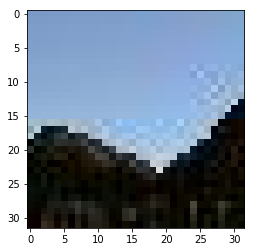

In [61]:
img=img_matrix[0]
plt.imshow(img)

In [62]:
print (train_data[0].shape)
print (train_data[1].shape)

(1437, 32, 32, 3)
(1437,)


In [63]:
#batch_size to train
batch_size = 32
# number of output classes
nb_classes = 3
# number of epochs to train
nb_epoch = 20


# number of convolutional filters to use
nb_filters = 32
# size of pooling area for max pooling
nb_pool = 2
# convolution kernel size
nb_conv = 3

In [64]:
#%%
(X, y) = (train_data[0],train_data[1])


# STEP 1: split X and y into training and testing sets

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4)

In [65]:
X_train = X_train.astype('float32')
X_test = X_test.astype('float32')

X_train /= 255
X_test /= 255

In [66]:
print('X_train shape:', X_train.shape)
print(X_train.shape[0], 'train samples')
print(X_test.shape[0], 'test samples')

X_train shape: (1149, 32, 32, 3)
1149 train samples
288 test samples


In [67]:
nb_classes = 3
# convert class vectors to binary class matrices
Y_train = np_utils.to_categorical(y_train, nb_classes)
Y_test = np_utils.to_categorical(y_test, nb_classes)

In [68]:
model = network2()
model.summary()

/root/.local/lib/python3.5/site-packages/ipykernel_launcher.py:5: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  """
/root/.local/lib/python3.5/site-packages/ipykernel_launcher.py:7: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(32, (3, 3))`
  import sys
/root/.local/lib/python3.5/site-packages/ipykernel_launcher.py:12: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3), padding="same")`
  if sys.path[0] == '':
/root/.local/lib/python3.5/site-packages/ipykernel_launcher.py:14: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(64, (3, 3))`
  


_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_19 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_20 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 64)        18496     
__________

In [69]:
model.compile('adam', 'categorical_crossentropy', ['accuracy'])

history = model.fit(X_train, Y_train, nb_epoch=20,verbose=1, validation_split=0.2)

model.save('AVO4_model.h5')
 

/usr/local/lib/python3.5/dist-packages/keras/models.py:942: UserWarning: The `nb_epoch` argument in `fit` has been renamed `epochs`.
  warnings.warn('The `nb_epoch` argument in `fit` '


Train on 919 samples, validate on 230 samples
Epoch 1/20
919/919 [==============================] - 16s 17ms/step - loss: 0.7897 - acc: 0.7171 - val_loss: 0.7051 - val_acc: 0.7217
Epoch 2/20
919/919 [==============================] - 14s 16ms/step - loss: 0.5950 - acc: 0.7552 - val_loss: 0.4184 - val_acc: 0.8261
Epoch 3/20
919/919 [==============================] - 15s 16ms/step - loss: 0.3560 - acc: 0.8618 - val_loss: 0.2679 - val_acc: 0.9130
Epoch 4/20
919/919 [==============================] - 15s 16ms/step - loss: 0.2220 - acc: 0.9042 - val_loss: 0.2164 - val_acc: 0.9522
Epoch 5/20
919/919 [==============================] - 15s 17ms/step - loss: 0.2134 - acc: 0.9217 - val_loss: 0.2128 - val_acc: 0.9304
Epoch 6/20
919/919 [==============================] - 15s 17ms/step - loss: 0.1510 - acc: 0.9467 - val_loss: 0.1759 - val_acc: 0.9609
Epoch 7/20
919/919 [==============================] - 15s 17ms/step - loss: 0.1372 - acc: 0.9456 - val_loss: 0.1540 - val_acc: 0.9739
Epoch 8/20
919/9

In [70]:
model=load_model('AVO4_model.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 32, 32, 32)        896       
_________________________________________________________________
activation_19 (Activation)   (None, 32, 32, 32)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 30, 30, 32)        9248      
_________________________________________________________________
activation_20 (Activation)   (None, 30, 30, 32)        0         
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 15, 15, 32)        0         
_________________________________________________________________
dropout_10 (Dropout)         (None, 15, 15, 32)        0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 15, 15, 64)        18496     
__________

In [71]:
print("Testing")

metrics = model.evaluate(X_test, Y_test)

Testing
288/288 [==============================] - 2s 6ms/step


In [72]:
for metric_i in range(len(model.metrics_names)):
        metric_name = model.metrics_names[metric_i]
        metric_value = metrics[metric_i]
        print('{}: {}'.format(metric_name, metric_value))

loss: 0.13807245590982753
acc: 0.9791666666666666


In [73]:

#file_path = '/root/TRAFFIC/TRAFFIC/traffic-light-classifier/data/red6.jpg'
#file_path = '/root/TRAFFIC/TRAFFIC/traffic-light-classifier/data/green.jpg'
#file_path = '/root/TRAFFIC/TRAFFIC/traffic-light-classifier/data/yellow2.jpg'
#file_path = '/root/TRAFFIC/TRAFFIC/traffic-light-classifier/data/image1.jpg'
#file_path = '/root/TRAFFIC/TRAFFIC/traffic-light-classifier/data/roi8.jpg'
#file_path = '/root/TRAFFIC/TRAFFIC/traffic-light-classifier/data/StopLightImage_1.jpg'
#file_path = '/root/TRAFFIC/TRAFFIC/traffic-light-classifier/data/StopLightImage_2.jpg'

#file_path = '/root/TRAFFIC/TRAFFIC/DATA/red_resized/red_resizedleft8804.jpg'
#file_path = '/root/TRAFFIC/TRAFFIC/DATA/yellow_resized/left8711.jpg'
#file_path = '/root/TRAFFIC/TRAFFIC/DATA/green_resized/left8691.jpg'


file_path = '/root/TRAFFIC/TRAFFIC/DATA/red/left8804.jpg'
#file_path = '/root/TRAFFIC/TRAFFIC/DATA/green/left8691.jpg'

desired_dim=(32,32)
img = cv2.imread(file_path)
img_resized = cv2.resize(img, desired_dim, interpolation=cv2.INTER_LINEAR)
img_ = np.expand_dims(np.array(img_resized), axis=0)

classes = model.predict_classes(img_)

print (classes)
if classes == 2:
    print ("GREEN")
if classes == 1:
    print ("YELLOW")
if classes == 0:
    print ("RED")


[0]
RED


In [75]:
from keras.preprocessing import image
# Classes = { 1: red, 2: yellow, 3: green, 4:off}
#file_path = '/root/TRAFFIC/TRAFFIC/traffic-light-classifier/data/red6.jpg'
#file_path = '/root/TRAFFIC/TRAFFIC/traffic-light-classifier/data/green.jpg'
#file_path = '/root/TRAFFIC/TRAFFIC/traffic-light-classifier/data/yellow.jpg'
#file_path = '/root/TRAFFIC/TRAFFIC/traffic-light-classifier/data/StopLightImage_2.jpg'
#file_path = '/root/TRAFFIC/TRAFFIC/traffic-light-classifier/data/image1.jpg'
#file_path = '/root/TRAFFIC/TRAFFIC/traffic-light-classifier/data/roi1.jpg'
#file_path = '/root/TRAFFIC/TRAFFIC/traffic-light-classifier/data/roi8.jpg'
#file_path = '/root/TRAFFIC/TRAFFIC/traffic-light-classifier/data/StopLightImage_1.jpg'
#file_path = '/root/TRAFFIC/TRAFFIC/traffic-light-classifier/data/left0073.jpg'


#file_path = '/root/TRAFFIC/TRAFFIC/DATA/red_resized/red_resizedleft8804.jpg'
#file_path = '/root/TRAFFIC/TRAFFIC/DATA/yellow_resized/left8711.jpg'
#file_path = '/root/TRAFFIC/TRAFFIC/DATA/green_resized/left8687.jpg'

#file_path = '/root/TRAFFIC/TRAFFIC/DATA/red/left8804.jpg'
#file_path = '/root/TRAFFIC/TRAFFIC/DATA/green/left8687.jpg'
file_path = '/root/TRAFFIC/TRAFFIC/DATA/yellow/left8711.jpg'

image1  = image.load_img(file_path, target_size=(32,32))
x = image.img_to_array(image1)
x = np.expand_dims(x,axis=0)
images = np.vstack([x])
classes = model.predict_classes(images, batch_size=1)


#y_classes = np_utils.argmax(classes)
#y_classes = keras.np_utils.probas_to_classes(y_proba)


#generator= train_datagen.flow_from_directory("./", batch_size=batch_size)
#label_map = (generator.class_indices)

#print ('Class Predicted = ', label_map)

print (classes)
if classes == 2:
    print ("GREEN")
if classes == 1:
    print ("YELLOW")
if classes == 0:
    print ("RED")



[1]
YELLOW
